# Exploring GSI's diagnostic files with Python

In order to facilitate the access to the contents of the GSI's diagnostic files, it has been written a fortran/python interface that reads the diagnostic binary file and create appropriate data structures to it. This Jupyter notebook is a simple walkthrough to its usage.

## Import the readdiag module

First, one need to load the "readdiag" fortran/python interface. This interface can be loaded just like any other python module:

In [1]:
import readdiag as rd

With the module loaded, open a file containing the conventional diagnostic information. For this, we will create the object "file" from which we will use the builtin methods and functions of the readdiag:

In [2]:
file = rd.open("/home/carlos/Documents/INPE2019/GDAD/ReadDiag/dados/DiagFiles/2013010100/diag/cptec.diag_conv_anl.20130101_00z.bin")

## Get the list of methods and functions

The "readdiag" fortran/python interface has several builtin methods and function. To get a list of the available methods and functions, type "file." and push the <TAB> button on the keyboard.

`>>> file.`

`file.FNumber     file.FileName2   file.GTable(     file.ObsInfo     file.close(      file.nVars       file.pcount(     file.pgeomap(    file.pvmap(      file.used        `

`file.FileName    file.GDict(      file.GTable_df(  file.VarNames    file.nObs        file.overview(   file.pfileinfo(  file.ptmap(      file.std_levs    `

Some of then have some documentation, which can be accessed using Python's docstrings. To access the usage of each function, then use the docstrings:

`print(object.function_name.__doc__)`

## Retrieve file information 

Now, let's get the basic information contained inside the file. These information are related to the binary file itself as well as the observations and its related information.

Get the file name using the method "FileName":

In [3]:
file.FileName

'/home/carlos/Documents/INPE2019/GDAD/ReadDiag/dados/DiagFiles/2013010100/diag/cptec.diag_conv_anl.20130101_00z.bin'

Retrieve the number associated with the file openned using the method "FNumber" (useful when several files are openned):

In [4]:
file.FNumber

1

One can use the function "pfileinfo()" to retrieve what observations and what types of observations are available inside the file (you can use the docstring to access the function's abstract):

In [5]:
print(file.pfileinfo.__doc__)


        Prints a fancy list of the existing variables and types.

        Usage: pfileinfo()
        


In [6]:
file.pfileinfo()

Variable Name : ps
              └── kx => 120  181  183  187  180  

Variable Name : t
              └── kx => 120  181  183  187  180  130  126  

Variable Name : q
              └── kx => 120  181  180  187  183  

Variable Name : uv
              └── kx => 253  254  257  259  258  220  281  284  287  280  243  290  221  230  252  250  242  228  229  224  245  282  246  247  251  223  

Variable Name : gps
              └── kx => 3  4  740  745  744  741  722  

Variable Name : pw
              └── kx => 153  



Another way to retrieve the file contents is using the function "overview()":

In [7]:
print(file.overview.__doc__)


        Creates a dictionary of the existing variables and types. Returns a Python dictionary.

        Usage: overview()
        


In [8]:
file.overview()

{'ps': [120, 181, 183, 187, 180],
 't': [120, 181, 183, 187, 180, 130, 126],
 'q': [120, 181, 180, 187, 183],
 'uv': [253,
  254,
  257,
  259,
  258,
  220,
  281,
  284,
  287,
  280,
  243,
  290,
  221,
  230,
  252,
  250,
  242,
  228,
  229,
  224,
  245,
  282,
  246,
  247,
  251,
  223],
 'gps': [3, 4, 740, 745, 744, 741, 722],
 'pw': [153]}

Another similar way to get a dictionary containing the basic information is with the method "ObsInfo":

In [9]:
file.ObsInfo

{'ps': array([[  120,   625],
        [  181, 17997],
        [  183,  4048],
        [  187, 40149],
        [  180,  8345]]), 't': array([[  120, 28138],
        [  181, 17862],
        [  183,  4013],
        [  187, 39969],
        [  180,  5381],
        [  130,  1463],
        [  126,  3942]]), 'q': array([[  120, 24402],
        [  181, 16710],
        [  180,  1890],
        [  187, 39617],
        [  183,  2961]]), 'uv': array([[   253,  39466],
        [   254, 155915],
        [   257,    607],
        [   259,   1466],
        [   258,    620],
        [   220,  33181],
        [   281,  17425],
        [   284,   3968],
        [   287,  38850],
        [   280,   4661],
        [   243,    673],
        [   290,   9021],
        [   221,    870],
        [   230,   1358],
        [   252,   5134],
        [   250,   8331],
        [   242,   1783],
        [   228,   1898],
        [   229,     61],
        [   224,  12699],
        [   245,  16908],
        [   282,    1

Use the method "VarNames" to get a list of the variable names from the file:

In [10]:
file.VarNames

['ps', 't', 'q', 'uv', 'gps', 'pw']

To get a list of the available standard levels, use the method "std_levs":

In [11]:
file.std_levs

[1000.0,
 900.0,
 800.0,
 700.0,
 600.0,
 500.0,
 400.0,
 300.0,
 250.0,
 200.0,
 150.0,
 100.0,
 50.0,
 0.0]

## Data exploration

The functions used in this section, needs the matplotlib library. First, let's load it:

In [12]:
import matplotlib.pyplot as plt

To simply count the number of records of some kind of observation, use the function "pcount()":

In [13]:
print(file.pcount.__doc__)


        Plots a histogram of the desired variable and types.

        Usage: pcount(VarName)
        


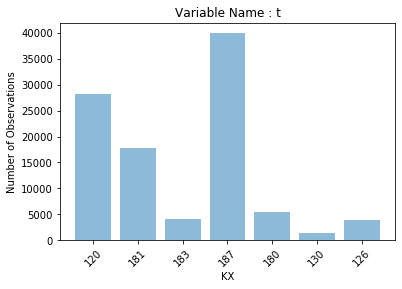

In [14]:
file.pcount("t")

Currently, there are a couple of ways to retrieve the information of observations diagnostics. One way is to use the "GTable()" function, wich return a Numpy array from an specific observation type (in this case, we have selected obs="t" and kx="120":

In [15]:
print(file.GTable.__doc__)


        Creates a list of the desired variable. Returns a Numpy array.

        Usage: GTable(VarName, kx, ObsLevels=None)
        


In [16]:
file.GTable("t","120")

array([[-9.0000e+01,  0.0000e+00,  2.8350e+03, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02],
       [-9.0000e+01,  0.0000e+00,  2.8350e+03, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02],
       [-9.0000e+01,  0.0000e+00,  2.8350e+03, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02],
       ...,
       [ 7.5970e+01,  3.4208e+02,  1.4000e+01, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02],
       [ 7.5880e+01,  3.4218e+02,  1.4000e+01, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02],
       [ 7.5780e+01,  3.4228e+02,  1.4000e+01, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02]], dtype=float32)

Note that the "GTable()" function also accepts a list of observation levels to be passed with it (say, 1000, 500 and 200 hPa):

In [17]:
file.GTable("t","120",[1000,500,200])

array([[-9.0000e+01,  0.0000e+00,  2.8350e+03, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02],
       [-9.0000e+01,  0.0000e+00,  2.8350e+03, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02],
       [-9.0000e+01,  0.0000e+00,  2.8350e+03, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02],
       ...,
       [ 7.5970e+01,  3.4208e+02,  1.4000e+01, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02],
       [ 7.5880e+01,  3.4218e+02,  1.4000e+01, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02],
       [ 7.5780e+01,  3.4228e+02,  1.4000e+01, ...,  1.0000e+15,
         1.0000e+15,  1.2000e+02]], dtype=float32)

Another useful way to get the observation information is using the function "GTable_df()", which returns a Pandas dataframe containing all the observational diagnostic information from the selected observation and type:

In [18]:
print(file.GTable_df.__doc__)


        Creates a list of the desired variable. Returns a Pandas dataframe.

        Usage: GTable_df(VarName, kx, ObsLevels=None)
        


In [19]:
file.GTable_df("t","120")

,lat,lon,elev,prs,dhgt,levs,time,pbqc,iuse,iusev,wpbqc,inp_err,adj_err,end_err,robs,omf,oma,imp,dfs,kx
0,-90.000000,0.000000,2835.0,691.000000,2.835000e+03,600.0,-15.000000,2.0,1.0,0.0,3.999999,1.250000,0.915256,0.915256,247.350006,0.688350,1.000000e+15,1.000000e+15,1.000000e+15,120.0
1,-90.000000,0.000000,2835.0,690.000000,1.000000e+11,600.0,-14.965200,2.0,1.0,0.0,3.999999,1.250000,0.475158,0.475158,246.050003,-0.629095,1.000000e+15,1.000000e+15,1.000000e+15,120.0
2,-90.000000,0.000000,2835.0,687.000000,1.000000e+11,600.0,-14.860200,2.0,1.0,0.0,3.999998,1.250000,0.974978,0.974978,245.649994,-1.081623,1.000000e+15,1.000000e+15,1.000000e+15,120.0
3,-90.000000,0.000000,2835.0,673.000000,1.000000e+11,600.0,-14.364600,2.0,1.0,0.0,3.999996,1.250000,1.250000,1.250000,247.949997,1.538258,1.000000e+15,1.000000e+15,1.000000e+15,120.0
4,-90.000000,0.000000,2835.0,658.000000,1.000000e+11,600.0,-13.819201,2.0,1.0,0.0,3.999999,1.250000,1.250000,1.250000,247.350006,-0.401955,1.000000e+15,1.000000e+15,1.000000e+15,120.0
5,-90.000000,0.000000,2835.0,634.000000,1.000000e+11,600.0,-12.921000,2.0,1.0,0.0,3.999999,1.250000,1.250000,1.250000,248.050003,0.261636,1.000000e+15,1.000000e+15,1.000000e+15,120.0
6,-90.000000,0.000000,2835.0,613.000000,1.000000e+11,600.0,-12.106800,2.0,1.0,0.0,3.999999,1.250000,1.196052,1.196052,246.949997,0.149076,1.000000e+15,1.000000e+15,1.000000e+15,120.0
7,-90.000000,0.000000,2835.0,602.000000,1.000000e+11,600.0,-11.670600,2.0,1.0,0.0,3.999999,1.250000,1.196052,1.196052,246.649994,0.279616,1.000000e+15,1.000000e+15,1.000000e+15,120.0
8,-90.000000,0.000000,2835.0,500.000000,5.160000e+03,500.0,-7.249800,2.0,1.0,0.0,3.999999,1.250000,1.190596,1.190596,240.050003,-0.029892,1.000000e+15,1.000000e+15,1.000000e+15,120.0
9,-90.000000,0.000000,2835.0,484.000000,1.000000e+11,400.0,-6.489600,2.0,1.0,0.0,3.999999,1.250000,1.190596,1.190596,238.850006,0.223013,1.000000e+15,1.000000e+15,1.000000e+15,120.0


The "GTable_df()" function also accepts a list of levels, say 800 hPa (a list with one element):

In [20]:
file.GTable_df("t","120",[800])

,lat,lon,elev,prs,dhgt,levs,time,pbqc,iuse,iusev,wpbqc,inp_err,adj_err,end_err,robs,omf,oma,imp,dfs,kx
0,-90.000000,0.000000,2835.0,691.000000,2.835000e+03,0.0,-15.000000,2.0,1.0,0.0,3.999999,1.250000,0.915256,0.915256,247.350006,0.688350,1.000000e+15,1.000000e+15,1.000000e+15,120.0
1,-90.000000,0.000000,2835.0,690.000000,1.000000e+11,0.0,-14.965200,2.0,1.0,0.0,3.999999,1.250000,0.475158,0.475158,246.050003,-0.629095,1.000000e+15,1.000000e+15,1.000000e+15,120.0
2,-90.000000,0.000000,2835.0,687.000000,1.000000e+11,0.0,-14.860200,2.0,1.0,0.0,3.999998,1.250000,0.974978,0.974978,245.649994,-1.081623,1.000000e+15,1.000000e+15,1.000000e+15,120.0
3,-90.000000,0.000000,2835.0,673.000000,1.000000e+11,0.0,-14.364600,2.0,1.0,0.0,3.999996,1.250000,1.250000,1.250000,247.949997,1.538258,1.000000e+15,1.000000e+15,1.000000e+15,120.0
4,-90.000000,0.000000,2835.0,658.000000,1.000000e+11,0.0,-13.819201,2.0,1.0,0.0,3.999999,1.250000,1.250000,1.250000,247.350006,-0.401955,1.000000e+15,1.000000e+15,1.000000e+15,120.0
5,-90.000000,0.000000,2835.0,634.000000,1.000000e+11,0.0,-12.921000,2.0,1.0,0.0,3.999999,1.250000,1.250000,1.250000,248.050003,0.261636,1.000000e+15,1.000000e+15,1.000000e+15,120.0
6,-90.000000,0.000000,2835.0,613.000000,1.000000e+11,0.0,-12.106800,2.0,1.0,0.0,3.999999,1.250000,1.196052,1.196052,246.949997,0.149076,1.000000e+15,1.000000e+15,1.000000e+15,120.0
7,-90.000000,0.000000,2835.0,602.000000,1.000000e+11,0.0,-11.670600,2.0,1.0,0.0,3.999999,1.250000,1.196052,1.196052,246.649994,0.279616,1.000000e+15,1.000000e+15,1.000000e+15,120.0
8,-90.000000,0.000000,2835.0,500.000000,5.160000e+03,0.0,-7.249800,2.0,1.0,0.0,3.999999,1.250000,1.190596,1.190596,240.050003,-0.029892,1.000000e+15,1.000000e+15,1.000000e+15,120.0
9,-90.000000,0.000000,2835.0,484.000000,1.000000e+11,0.0,-6.489600,2.0,1.0,0.0,3.999999,1.250000,1.190596,1.190596,238.850006,0.223013,1.000000e+15,1.000000e+15,1.000000e+15,120.0


Note that the column "lev" in the dataframe has been filtered.

### Dataframe exploration

Since the Pandas' dataframe is a powerfull data structure, this section shows some generic operations related to it.

Examples:

Gets the shape of the dataframe:

In [21]:
file.GTable_df("t","120").shape

(28138, 20)

Gets a description of the indexes (lines):

In [22]:
file.GTable_df("t","120").index

RangeIndex(start=0, stop=28138, step=1)

Gets a description of the columns:

In [23]:
file.GTable_df("t","120").columns

Index(['lat', 'lon', 'elev', 'prs', 'dhgt', 'levs', 'time', 'pbqc', 'iuse',
       'iusev', 'wpbqc', 'inp_err', 'adj_err', 'end_err', 'robs', 'omf', 'oma',
       'imp', 'dfs', 'kx'],
      dtype='object')

Data counting (columnwise):

In [24]:
file.GTable_df("t","120").count()

lat        28138
lon        28138
elev       28138
prs        28138
dhgt       28138
levs       28138
time       28138
pbqc       28138
iuse       28138
iusev      28138
wpbqc      28138
inp_err    28138
adj_err    28138
end_err    28138
robs       28138
omf        28138
oma        28138
imp        28138
dfs        28138
kx         28138
dtype: int64

Prints the head of the dataframe:

In [25]:
file.GTable_df("t","120").head()

,lat,lon,elev,prs,dhgt,levs,time,pbqc,iuse,iusev,wpbqc,inp_err,adj_err,end_err,robs,omf,oma,imp,dfs,kx
0,-90.0,0.0,2835.0,691.0,2.835000e+03,600.0,-15.000000,2.0,1.0,0.0,3.999999,1.25,0.915256,0.915256,247.350006,0.688350,1.000000e+15,1.000000e+15,1.000000e+15,120.0
1,-90.0,0.0,2835.0,690.0,1.000000e+11,600.0,-14.965200,2.0,1.0,0.0,3.999999,1.25,0.475158,0.475158,246.050003,-0.629095,1.000000e+15,1.000000e+15,1.000000e+15,120.0
2,-90.0,0.0,2835.0,687.0,1.000000e+11,600.0,-14.860200,2.0,1.0,0.0,3.999998,1.25,0.974978,0.974978,245.649994,-1.081623,1.000000e+15,1.000000e+15,1.000000e+15,120.0
3,-90.0,0.0,2835.0,673.0,1.000000e+11,600.0,-14.364600,2.0,1.0,0.0,3.999996,1.25,1.250000,1.250000,247.949997,1.538258,1.000000e+15,1.000000e+15,1.000000e+15,120.0
4,-90.0,0.0,2835.0,658.0,1.000000e+11,600.0,-13.819201,2.0,1.0,0.0,3.999999,1.25,1.250000,1.250000,247.350006,-0.401955,1.000000e+15,1.000000e+15,1.000000e+15,120.0


Sums up the dataframe values (for a specific observation and type):

In [26]:
file.GTable_df("t","120").sum()

lat        8.492136e+05
lon        4.790672e+06
elev       8.124922e+06
prs        1.026872e+07
dhgt       1.912163e+15
levs       9.485650e+06
time      -1.799208e+05
pbqc       6.233600e+04
iuse       2.678800e+04
iusev      6.828600e+04
wpbqc      1.110362e+05
inp_err    3.035162e+04
adj_err    2.411511e+04
end_err    2.356228e+04
robs       6.653652e+06
omf        1.053545e+02
oma        2.813842e+19
imp        2.813842e+19
dfs        2.813842e+19
kx         3.376560e+06
dtype: float32

Finds the minima of a specific observation and type in the dataframe (columnwise):

In [27]:
file.GTable_df("t","120").min()

lat       -9.000000e+01
lon        0.000000e+00
elev      -2.200000e+01
prs        2.600000e+00
dhgt      -2.200000e+01
levs       0.000000e+00
time      -1.800000e+02
pbqc       1.000000e+00
iuse      -1.000000e+00
iusev      0.000000e+00
wpbqc      0.000000e+00
inp_err    6.666667e-01
adj_err    5.555556e-07
end_err    0.000000e+00
robs       1.808500e+02
omf       -5.675055e+01
oma        1.000000e+15
imp        1.000000e+15
dfs        1.000000e+15
kx         1.200000e+02
dtype: float32

Finds the maxima of a specific observation and type in the dataframe (columnwise):

In [28]:
file.GTable_df("t","120").max()

lat        8.266000e+01
lon        3.599700e+02
elev       4.508000e+03
prs        1.039000e+03
dhgt       1.000000e+11
levs       1.000000e+03
time       1.108296e+02
pbqc       1.500000e+01
iuse       1.000000e+00
iusev      1.020000e+02
wpbqc      3.999999e+00
inp_err    1.250000e+00
adj_err    1.250000e+00
end_err    1.250000e+00
robs       3.084500e+02
omf        8.947617e+01
oma        1.000000e+15
imp        1.000000e+15
dfs        1.000000e+15
kx         1.200000e+02
dtype: float32

Finds the index of the minima for a specific observation and type (columnwise):

In [29]:
file.GTable_df("t","120").idxmin()

lat            0
lon            0
elev        4568
prs         8627
dhgt        4568
levs          22
time       16038
pbqc        3663
iuse          68
iusev          0
wpbqc       3870
inp_err       55
adj_err     7101
end_err     7099
robs        7828
omf        26815
oma            0
imp            0
dfs            0
kx             0
dtype: int64

Finds the index of the maxima for a specific observation and type (columnwise):

In [30]:
file.GTable_df("t","120").idxmax()

lat        25698
lon          631
elev        8589
prs         7102
dhgt           1
levs          57
time        7939
pbqc       23665
iuse           0
iusev       2839
wpbqc          4
inp_err        0
adj_err        3
end_err        3
robs       11827
omf        26381
oma            0
imp            0
dfs            0
kx             0
dtype: int64

Gets a statistical description of the data for a specific observation and type:

In [31]:
file.GTable_df("t","120").describe()

,lat,lon,elev,prs,dhgt,levs,time,pbqc,iuse,iusev,wpbqc,inp_err,adj_err,end_err,robs,omf,oma,imp,dfs,kx
count,28138.000000,28138.000000,28138.000000,28138.000000,2.813800e+04,28138.000000,28138.000000,28138.000000,28138.000000,28138.000000,28138.000000,28138.000000,2.813800e+04,28138.000000,28138.000000,28138.000000,2.813800e+04,2.813800e+04,2.813800e+04,28138.0
mean,30.180159,170.255692,288.752655,364.941620,6.796148e+10,337.111725,-6.394221,2.215367,0.952022,2.426825,3.946112,1.078640,8.570291e-01,0.837381,236.468216,0.003744,1.000000e+15,1.000000e+15,1.000000e+15,120.0
std,29.240499,102.330284,503.037506,316.248962,4.666329e+10,307.517883,34.359955,1.505494,0.306034,15.515448,0.429751,0.187460,2.631499e-01,0.291296,27.864212,2.526659,0.000000e+00,0.000000e+00,0.000000e+00,0.0
min,-90.000000,0.000000,-22.000000,2.600000,-2.200000e+01,0.000000,-180.000000,1.000000,-1.000000,0.000000,0.000000,0.666667,5.555556e-07,0.000000,180.850006,-56.750549,1.000000e+15,1.000000e+15,1.000000e+15,120.0
25%,19.910000,93.285000,17.000000,75.800003,1.812000e+04,50.000000,-30.000000,2.000000,1.000000,0.000000,3.999997,0.909091,6.931126e-01,0.674921,213.449997,-0.854450,1.000000e+15,1.000000e+15,1.000000e+15,120.0
50%,37.360001,146.789993,79.000000,261.000000,1.000000e+11,250.000000,-9.861000,2.000000,1.000000,0.000000,3.999999,1.111111,8.699167e-01,0.864238,228.300003,-0.021537,1.000000e+15,1.000000e+15,1.000000e+15,120.0
75%,50.070000,265.950012,307.000000,629.000000,1.000000e+11,600.000000,16.799999,2.000000,1.000000,0.000000,3.999999,1.250000,1.041667e+00,1.041667,259.549988,0.816484,1.000000e+15,1.000000e+15,1.000000e+15,120.0
max,82.660004,359.970001,4508.000000,1039.000000,1.000000e+11,1000.000000,110.829597,15.000000,1.000000,102.000000,3.999999,1.250000,1.250000e+00,1.250000,308.450012,89.476166,1.000000e+15,1.000000e+15,1.000000e+15,120.0


Gets the mean of a specific observation and type (columnwise):

In [32]:
file.GTable_df("t","120").mean()

lat        3.018031e+01
lon        1.702563e+02
elev       2.887527e+02
prs        3.649413e+02
dhgt       6.795659e+10
levs       3.371117e+02
time      -6.394230e+00
pbqc       2.215367e+00
iuse       9.520222e-01
iusev      2.426825e+00
wpbqc      3.946128e+00
inp_err    1.078670e+00
adj_err    8.570299e-01
end_err    8.373830e-01
robs       2.364650e+02
omf        3.744207e-03
oma        1.000015e+15
imp        1.000015e+15
dfs        1.000015e+15
kx         1.200000e+02
dtype: float32

Gets the median of a specific observation and type (columnwise):

In [33]:
file.GTable_df("t","120").median()

lat        3.736000e+01
lon        1.467900e+02
elev       7.900000e+01
prs        2.610000e+02
dhgt       1.000000e+11
levs       2.500000e+02
time      -9.861000e+00
pbqc       2.000000e+00
iuse       1.000000e+00
iusev      0.000000e+00
wpbqc      3.999999e+00
inp_err    1.111111e+00
adj_err    8.699167e-01
end_err    8.642378e-01
robs       2.283000e+02
omf       -2.153705e-02
oma        1.000000e+15
imp        1.000000e+15
dfs        1.000000e+15
kx         1.200000e+02
dtype: float32

### Data selection

Within a Pandas' dataframe, use the "loc" method to select indexes and columns.

Selects the all indexes from column "omf" for a specific observation and type (columnwise):

In [34]:
file.GTable_df("t","120").loc[:,"omf"]

0        0.688350
1       -0.629095
2       -1.081623
3        1.538258
4       -0.401955
5        0.261636
6        0.149076
7        0.279616
8       -0.029892
9        0.223013
10      -0.895289
11      -0.385720
12      -2.186518
13      -0.457376
14      -0.317585
15       1.500166
16       0.708966
17       0.299121
18       0.257041
19       0.564293
20       0.282785
21       0.194717
22      -0.221898
23       0.200614
24       5.855449
25       5.757417
26       3.960966
27      -0.067226
28       0.126573
29      -0.565856
           ...   
28108   -0.755892
28109    1.146560
28110    0.372296
28111    0.273160
28112    0.535049
28113   -1.033576
28114    2.170959
28115    2.262799
28116   -0.115252
28117    1.339119
28118   -0.490555
28119    0.391534
28120    0.507493
28121    1.099367
28122   -0.834778
28123    0.821304
28124    0.912593
28125    1.047243
28126    0.117315
28127   -0.005522
28128    2.653383
28129    2.239943
28130   -0.355838
28131    0.454948
28132   -0

## Making spatial plots using readdiag's builtin functions

Until here, all methods and functions from the readdiag fortran/python interface have been used to explore the diagnostic information by means of appropriated data structures. But one of the most useful its functions, is the capability to plot the data. Let's take a look at it.

First, load the basemap toolkit:

In [35]:
from mpl_toolkits.basemap import Basemap

Use the builtin function "ptmap()" to plot the spatial distribution of the observations by type (kx):

In [36]:
print(file.ptmap.__doc__)


        Plots a spatial distribution of a desired variable and type.

        Usage: ptmap(VarName, kx)
        


/home/carlos/Documents/INPE2019/GDAD/ReadDiag/gsidiag/readdiag.py:564: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-90, urcrnrlat=90, projection='mill', resolution='c')
/home/carlos/Documents/INPE2019/GDAD/ReadDiag/gsidiag/readdiag.py:596: MatplotlibDeprecationWarning: Unrecognized location 'right center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(handles=legend_labels, numpoints=1, loc='right center', bbox_to_anchor=(legXMargin, -0.05), fancybox=False, shadow=False, frameon=False, ncol=legNCols, prop={"size": 9})


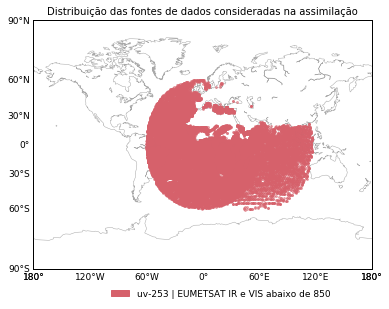

In [37]:
file.ptmap("uv", [253])

*NOTE:* In the previous figure, the title should be read as "Distribution of data sources considered into assimilation" and the produced legend should be read as "uv-253 | EUMETSAT IR and VIS below 850".

As the builtin function "ptmap()" uses the information about the observation and its kind (kx), it is also possible to pass a list of "kx" related to that observation type. Remember that you can use the builtin function "pfileinfo()" to retrieve the "kx" of each existing observation:

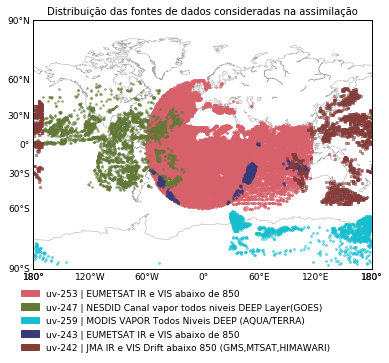

In [38]:
file.ptmap("uv", [253, 247, 259, 243, 242])

*NOTE:* In the previous figure, the title should be read as "Distribution of data sources considered into assimilation" and the produced legend should be read as "uv-253 | EUMETSAT IR and VIS below 850"; "uv-247 | NESDID Water vapour channel all levels DEEP Layer (GOES)"; "uv-259 | MODIS VAPOR All Levels DEEP (AQUA/TERRA)"; "uv-243 | EUMETSAT IR and VIS below 850" and "uv-242 | JMA IR and VIS Drift below 850 (GMS,MTSAT,HIMAWARI)".

Another interesting builtin function available, is the function "pvmap()", which plots the spatial distribution of different observations considering all the different types (kx). In this case, it is needed to specify the status of the observation to be plotted, i.e., (1) used and (-1) monitored. The statuses of the observations must be passed as a list with at least one element:

In [39]:
print(file.pvmap.__doc__)


        Plots a spatial distribution of a desired variable with specified attributes.

        Usage: pvmap(VarName, use=None)
        


/home/carlos/Documents/INPE2019/GDAD/ReadDiag/gsidiag/readdiag.py:635: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-90, urcrnrlat=90, projection='mill', resolution='c')
/home/carlos/Documents/INPE2019/GDAD/ReadDiag/gsidiag/readdiag.py:660: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(handles=legend_labels, numpoints=1, loc='left center', bbox_to_anchor=(1, 0.9), fancybox=False, shadow=False, frameon=False, ncol=1, prop={"size": 10})


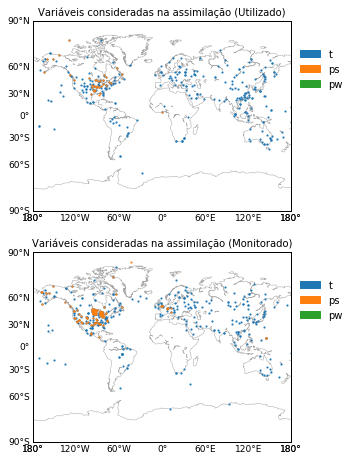

In [40]:
file.pvmap(["t", "ps", "pw"], use=[1, -1])

*NOTE:* In the previous figures, the titles should be read as (top) "Variables considered into assimilation (used)" and (bottom) "Variables used into assimilation (monitored)".

The readdiag fortran/python interface, has also the builtin "pgeomap()" function. This function plots the spatial distribution of variables using one of the columns of the "GTable_df" dataframe (altought it does not use the dataframe itself to make the plot):

In [41]:
print(file.pgeomap.__doc__)


        Plots a spatial distribution of a desired variable and type with a specified attribute.

        Usage: pgeomap(VarName, kx, WhatPlot, title=None, Data=None, Nmin=None, Nmax=None, WhatLabel=None)
        


/home/carlos/Documents/INPE2019/GDAD/ReadDiag/gsidiag/readdiag.py:388: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  resolution = 'c')
/home/carlos/Documents/INPE2019/GDAD/ReadDiag/gsidiag/readdiag.py:392: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries(linewidth=0.5, color = 'grey')


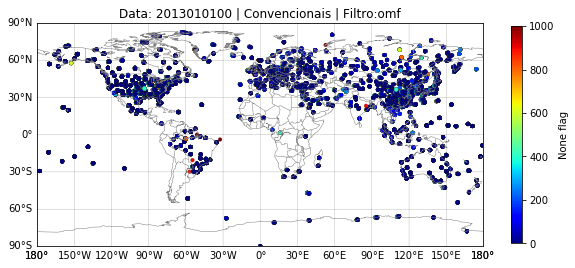

In [42]:
file.pgeomap("t",[120,180],"omf","Teste","2013010100",200,800)

*NOTE:* In the previous figure, the title should be read as "Date: 2013010100 | Conventional | Filter: omf".